In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('dataset.csv')

In [ ]:
np.unique(dataset['Class'])

array([1., 2., 3.])

In [ ]:
  main_values=list(dataset['Class'].unique())
  for val in main_values:
    dataset.loc[dataset['Class']==val,'Class']=main_values.index(val)

In [ ]:
copy_dataset=dataset.copy()

In [ ]:
dataset.head(20)

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Grove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0.0
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0.0
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,0.0
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,0.0
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,0.0
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,0.0


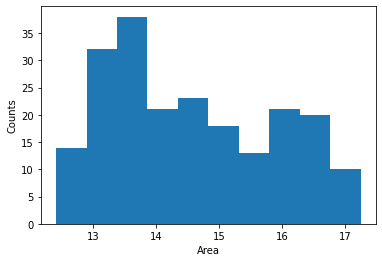

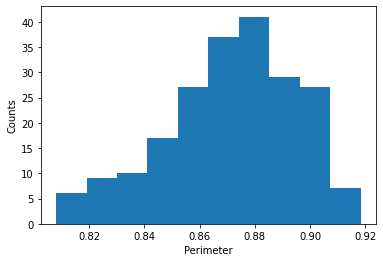

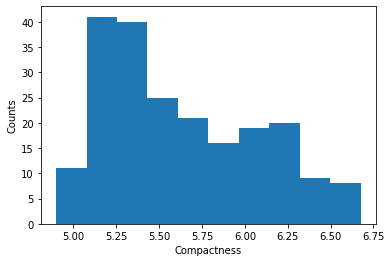

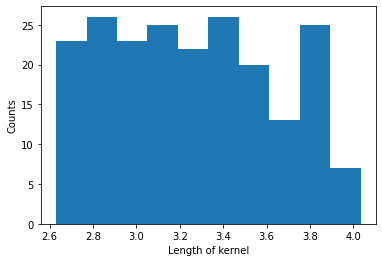

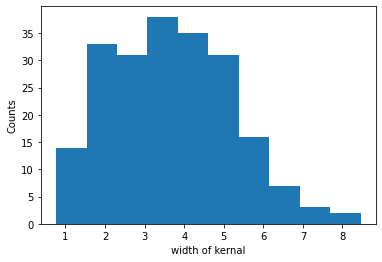

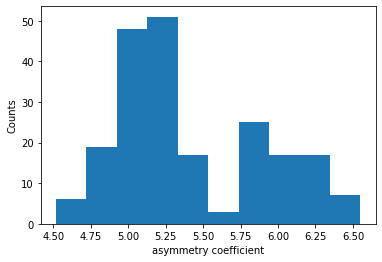

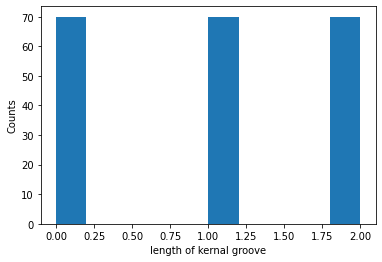

In [ ]:
features=['Area','Perimeter','Compactness','Length of kernel','width of kernal','asymmetry coefficient','length of kernal groove']
for i in range(1,8):
  x=dataset.iloc[:,i]
  plt.hist(x)
  plt.xlabel(features[i-1])
  plt.ylabel('Counts')
  plt.show()

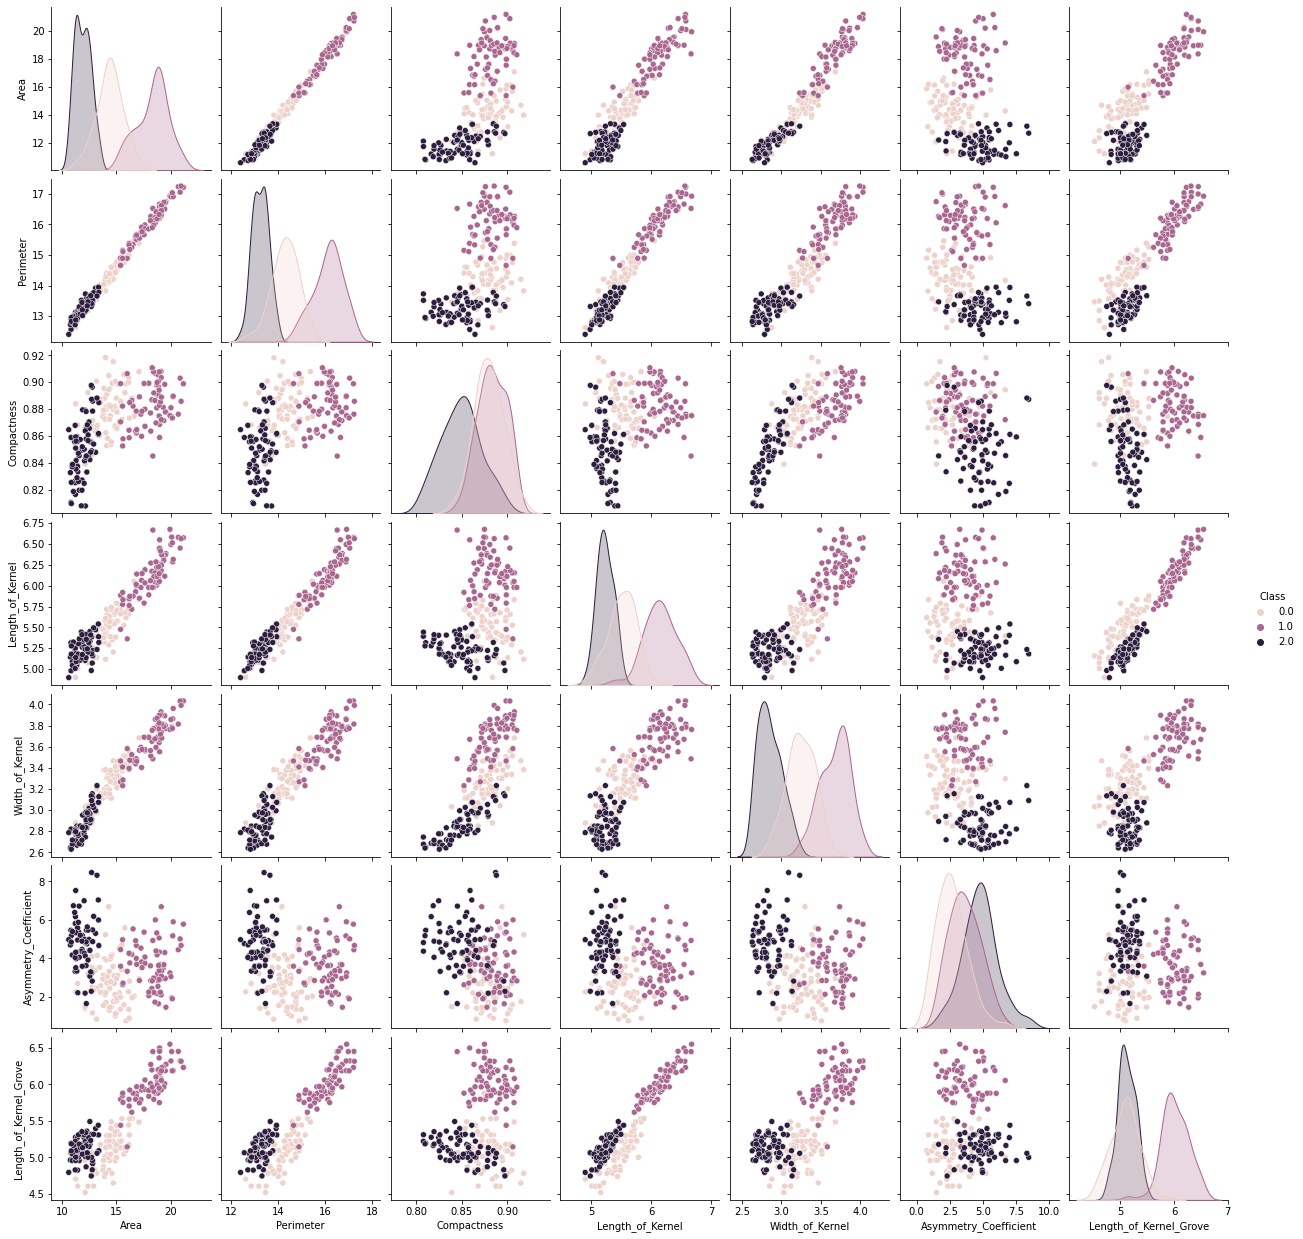

In [ ]:
sns.pairplot(dataset,hue='Class')

In [ ]:
#Prior probabilities:
class_value=list(dataset['Class'].unique())
Total_length=dataset['Class'].shape[0]
Prob=[]
for i in class_value:
  a=dataset.loc[(dataset['Class'])==i,'Class'].shape[0]
  Prob.append((a/Total_length,i))
Prob  

(array([ 6.,  9., 10., 17., 27., 37., 41., 29., 27.,  7.]),
 array([0.8081 , 0.81912, 0.83014, 0.84116, 0.85218, 0.8632 , 0.87422,
        0.88524, 0.89626, 0.90728, 0.9183 ]),
 <a list of 10 Patch objects>)

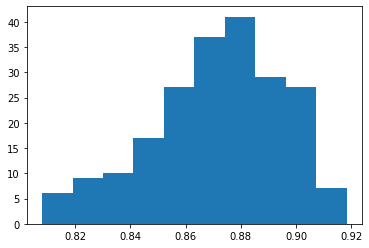

In [ ]:
x=dataset.iloc[:,2]
plt.hist(x,bins=10)

In [ ]:
(dataset.describe())

In [ ]:
features=['Area','Perimeter','Compactness','Length_of_Kernel','Width_of_Kernel','Asymmetry_Coefficient','Length_of_Kernel_Grove']

L=[]

for feature in features:
  q75=dataset.describe().iloc[6][feature]
  q25=dataset.describe().iloc[4][feature]
  diff=q75-q25
  cbrt=((dataset.shape[0])**(1./3))
  L.append((2*(diff/cbrt)))

bins_list=[]
for feature in features:
  a=dataset[feature].max()
  b=dataset[feature].min()
  d=a-b
  bins_list.append(round(d/L[features.index(feature)]))
  

In [ ]:
L

[1.6941676018001541,
 0.7621230621802085,
 0.010388763595944336,
 0.2414230892336864,
 0.20785939146217383,
 0.7426914476809116,
 0.2799498400591317]

In [ ]:
dataset['Compactness'].min()

0.8081

In [ ]:
for i in range(len(bins_list)):
  val=bins_list[i]
  Min=dataset[features[i]].min()
  Max=dataset[features[i]].max()
  for j in range(val):
    if(j!=val-1):
      copy_dataset.loc[(dataset[features[i]]>=Min+(j*L[i]))&(dataset[features[i]]<Min+((j+1)*L[i])),features[i]]=j
    else:
      copy_dataset.loc[dataset[features[i]]>Min+(j*L[i]),features[i]]=j  


In [ ]:
copy_dataset.head(100)

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Grove,Class
0,2.0,3.0,6.0,3.0,3.0,1.0,2.0,0.0
1,2.0,2.0,7.0,2.0,3.0,0.0,1.0,0.0
2,2.0,2.0,9.0,1.0,3.0,2.0,1.0,0.0
3,1.0,2.0,8.0,1.0,3.0,2.0,1.0,0.0
4,3.0,3.0,9.0,3.0,4.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...
95,3.0,4.0,5.0,5.0,4.0,3.0,5.0,1.0
96,5.0,5.0,7.0,5.0,5.0,3.0,6.0,1.0
97,4.0,5.0,5.0,6.0,4.0,1.0,6.0,1.0
98,4.0,5.0,5.0,5.0,4.0,2.0,6.0,1.0


In [ ]:
f=[]
for feature in features:
  main_val=list(copy_dataset[feature].unique())
  for val in main_val:
    a=(copy_dataset.loc[((copy_dataset[feature]==val) & (copy_dataset['Class']==0)),feature].shape[0])/copy_dataset[copy_dataset['Class']==0].shape[0]
    b=(copy_dataset.loc[((copy_dataset[feature]==val) & (copy_dataset['Class']==1)),feature].shape[0])/copy_dataset[copy_dataset['Class']==1].shape[0]
    c=(copy_dataset.loc[((copy_dataset[feature]==val) & (copy_dataset['Class']==2)),feature].shape[0])/copy_dataset[copy_dataset['Class']==2].shape[0]
    f.append((feature,a,b,c,val)) 
for elements in f:
  print("For feature and value",elements[0],'and ',elements[4],"the likelihood probability for class 0 is ",elements[1],"the likelihood probability for class 1 is",elements[2],"the likelihood probability for class 2 is",elements[3],)

For feature and value Area and  2.0 the likelihood probability for class 0 is  0.5285714285714286 the likelihood probability for class 1 is 0.07142857142857142 the likelihood probability for class 2 is 0.0
For feature and value Area and  1.0 the likelihood probability for class 0 is  0.2714285714285714 the likelihood probability for class 1 is 0.0 the likelihood probability for class 2 is 0.3
For feature and value Area and  3.0 the likelihood probability for class 0 is  0.14285714285714285 the likelihood probability for class 1 is 0.2 the likelihood probability for class 2 is 0.0
For feature and value Area and  0.0 the likelihood probability for class 0 is  0.05714285714285714 the likelihood probability for class 1 is 0.0 the likelihood probability for class 2 is 0.7
For feature and value Area and  4.0 the likelihood probability for class 0 is  0.0 the likelihood probability for class 1 is 0.44285714285714284 the likelihood probability for class 2 is 0.0
For feature and value Area and 

In [ ]:
F=[]
for feature in features:
  main_val=list(copy_dataset[feature].unique())
  p=[]
  for val in main_val:
    a=(copy_dataset.loc[copy_dataset[feature]==val,feature].shape[0])
    p.append(a)
  F.append(p) 
F   
# for elements in f:
#   print("For feature and value",elements[0],'and ',elements[4],"the likelihood probability for class 0 is ",elements[1],"the likelihood probability for class 1 is",elements[2],"the likelihood probability for class 2 is",elements[3],)

[[42, 40, 24, 53, 31, 20],
 [27, 38, 26, 52, 33, 34],
 [37, 39, 13, 27, 29, 2, 24, 11, 14, 9, 5],
 [28, 43, 48, 23, 27, 25, 16],
 [31, 29, 36, 34, 35, 8, 37],
 [28, 14, 34, 37, 28, 36, 19, 7, 4, 3],
 [64, 50, 22, 15, 13, 30, 16]]

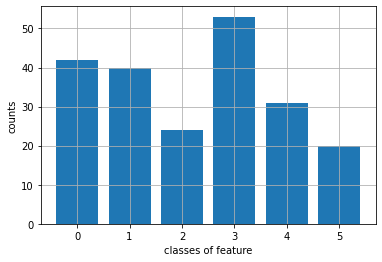

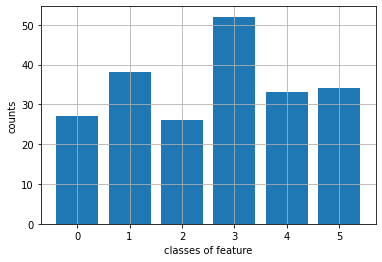

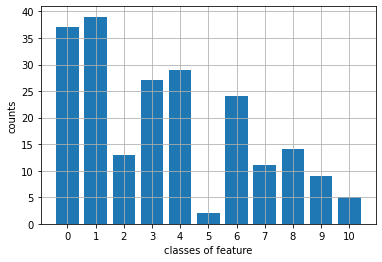

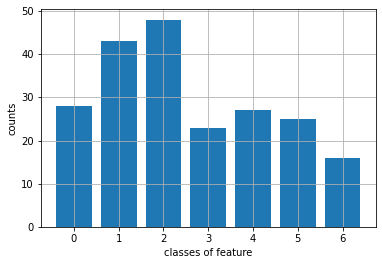

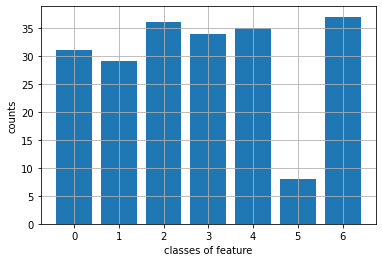

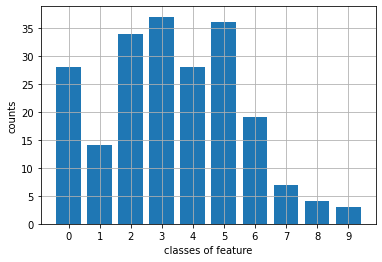

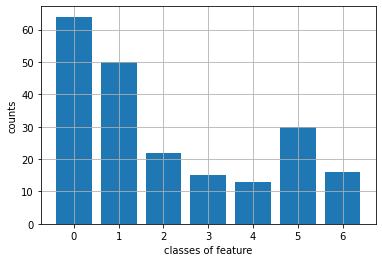

In [ ]:
for lists in F:
  x=[i for i in range(len(lists))]
  plt.bar(x,lists)
  plt.xticks(x)
  plt.xlabel("classes of feature")
  plt.ylabel("counts")
  plt.grid()
  plt.show()

In [ ]:
def likelihood_probab(dataset,feature,cls):
  main_val=list(dataset[feature].unique())
  L=[]
  for val in main_val:
    count_of_element=dataset.loc[(dataset[feature]==val) & (dataset['Class']==cls),feature].shape[0]
    prob=count_of_element/dataset[dataset['Class']==cls].shape[0]
    L.append(prob)
  return L

In [ ]:
  def post_prob(dataset,feature):
    class_0=likelihood_probab(dataset,feature,0)
    class_1=likelihood_probab(dataset,feature,1)
    class_2=likelihood_probab(dataset,feature,2)
    L1=[]
    main_val=list(dataset[feature].unique())
    for val in main_val:
      tot=dataset[dataset[feature]==val].shape[0]
      denominator=dataset['Class'].shape[0]
      L1.append(tot/denominator)
    L2=[]  
    for i in range(3):
      tot=dataset[dataset['Class']==i].shape[0]
      denominator=dataset[feature].shape[0]
      L2.append(tot/denominator)
    Ans=[]
    for i in range(3):
      op=[]
      for j in range(len(class_0)):
        if(i==0):
          prob=(class_0[j]*L2[i])/L1[j]
          op.append(prob)
        elif(i==1):
          prob=(class_1[j]*L2[i])/L1[j]
          op.append(prob)
        else:
          prob=(class_2[j]*L2[i])/L1[j]
          op.append(prob)
      Ans.append(op)      
    return Ans

In [ ]:
post_prob(copy_dataset,'Area')

[[0.8809523809523808,
  0.4749999999999999,
  0.41666666666666663,
  0.07547169811320754,
  0.0,
  0.0],
 [0.11904761904761904, 0.0, 0.5833333333333334, 0.0, 0.9999999999999998, 1.0],
 [0.0, 0.525, 0.0, 0.9245283018867924, 0.0, 0.0]]